<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import factorial
from matplotlib.pyplot import plot
from IPython import display


#Combinations
Given a set of n items how many distinct subsets of size k can you form? Order does not matter. 

EX: How many pairs of fruit can you pick from {apple, banana, pear}?

Spoken as "n choose k"  

Written as 
$n \choose k$ = $ \frac{n!}{k! (n-k)!}$

In [0]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

There are 10 ways to choose 1 thing from 10 things.  
There is only one way to choose 10 things from a set of 10 things.  
There are 252 ways to choose 5 things from a set of 10 things.


In [71]:
comb10_1 = '{10 \choose 1 } = ' + str(int(comb(10, 1)))
comb10_10 = '{10 \choose 10 } = ' + str(int(comb(10, 10)))
comb10_5 = '{10 \choose 5 } = ' + str(int(comb(10, 5)))

display.display(display.Math(comb10_1 +',  '+ comb10_10 +',  '+ comb10_5))

<IPython.core.display.Math object>

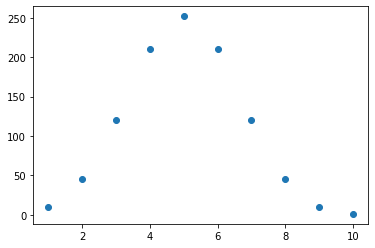

In [0]:
xs = range(1,11)
ys = [comb(10, k) for k in xs]
plot(xs, ys, 'o')

Given n binary trials, what is the probability of k sucesses?

In [0]:
def binomial(n,p):
  def distribution(k):
    return comb(n, k) * p**k * (1-p)**(n-k)

  return distribution

In [0]:
binomial(10, 1/13)(5)

0.0004548552879040863

In [0]:
p = binomial(7,1/5)

In [0]:
sum([p(k) for k in range(2,8)])

0.4232832000000002

In [0]:
p2 = binomial(25,1/10)


In [0]:
sum([p2(k) for k in range(2,25)])

0.7287940935386341